# Using shallow water equations to understand large-scale dynamics
### MAQ - 32806, Chiel van Heerwaarden, 2016
In this tutorial you will use the previously derived shallow water equations to solve the famous Rossby adjustment problem in which a perturbation is added to a layer of fluid.

## 1. Bla
More bla.

In [1]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


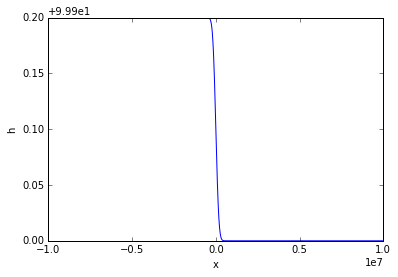

In [2]:
n = 2001
L = 1.e7
x = np.linspace(-L, L, n)
dx = x[1]-x[0]
u0 = np.zeros(n)
v0 = np.zeros(n)
h_ref   = 100.
h_prime = 0.1
h0 = np.copy(x)
for i in range(n):
    h0[i] = h_ref - h_prime*np.math.erf(h0[i]/(20*dx))
pl.plot(x, h0, 'b-')
pl.xlabel('x')
pl.ylabel('h');

In [3]:
f = 1.e-4
g = 10.
try:
    Lr = (g*h_ref)**.5 / f
except ZeroDivisionError:
    Lr = np.infty
finally:
    print "Rossby radius of deformation = {0} m".format(Lr)
    print "Lr / L = {0}".format(Lr/L)

Rossby radius of deformation = 316227.766017 m
Lr / L = 0.0316227766017


In [4]:
u = np.zeros(n+2)
v = np.zeros(n+2)
h = np.zeros(n+2)
u[1:-1] = u0[:]
v[1:-1] = v0[:]
h[1:-1] = h0[:]

nt = 200000
dt = 3.
for t in range(nt):
    # Set the BCs
    u[ 0] = u[ 1]
    u[-1] = u[-2]
    v[ 0] = v[ 1]
    v[-1] = v[-2]
    h[ 0] = h[ 1]
    h[-1] = h[-2]
    
    # Time integrate
    dudt = -u[1:-1]*(u[2::]-u[0:-2])/(2.*dx) + f*v[1:-1] - g*(h[2::] - h[0:-2])/(2.*dx)
    dvdt = -u[1:-1]*(v[2::]-v[0:-2])/(2.*dx) - f*u[1:-1]
    dhdt = -h[1:-1]*(u[2::]-u[0:-2])/(2.*dx)
    u[1:-1] += dt * dudt
    v[1:-1] += dt * dvdt
    h[1:-1] += dt * dhdt

u = u[1:-1]
v = v[1:-1]
h = h[1:-1]

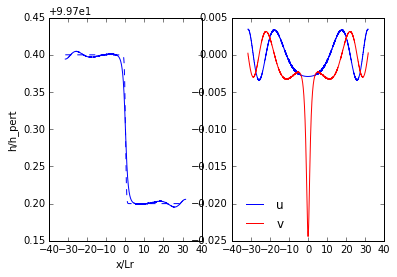

In [5]:
pl.figure()
pl.subplot(121)
pl.plot(x/Lr, h , 'b-' )
pl.plot(x/Lr, h0, 'b--')
pl.xlabel('x/Lr')
pl.ylabel('h/h_pert')
#pl.xlim(-5, 5)
pl.subplot(122)
pl.plot(x/Lr, u, 'b-', label='u')
pl.plot(x/Lr, v, 'r-', label='v')
#pl.xlim(-5, 5)
pl.legend(loc=0, frameon=False);